In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Loading the dataset
df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [2]:
#replace all shot 'made' to 1 and shot 'missed' to 0
d = {'made': 1, 'missed': 0}
df['SHOT_RESULT'] = df['SHOT_RESULT'].replace(d)
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [82]:
# group by shot distances and find averages of score
prop = df.groupby('SHOT_DIST')[['SHOT_RESULT']].mean().reset_index()

In [48]:
prop.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/shotLogs.json', orient='values')

In [11]:
salaries = pd.read_csv('NBAsalary.csv')
salaries.head()
g = salaries[salaries['team'] == 'Golden State Warriors']
gsw_salaries = g.groupby('season')[['salary']].mean().reset_index()
gsw_salaries.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/GSWsalaries.json', orient='values')

In [10]:
gsw_salaries

,season,salary
0,2002-2003,34823000.0
1,2003-2004,31413000.0
2,2004-2005,10103000.0
3,2005-2006,55198952.0
4,2006-2007,47829327.0
5,2007-2008,46585207.0
6,2008-2009,47730541.0
7,2009-2010,44920263.0
8,2010-2011,56944601.0
9,2011-2012,50348542.0


In [84]:
year_sal = salaries.groupby('season')[['salary']].mean().reset_index()
year_sal.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/salaries.json', orient = 'values')

In [57]:
players = pd.read_csv('all_seasons.csv')
gsw_players = players[players['team_abbreviation'] == 'GSW'].reset_index(drop = True)
gsw_players.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,50,Donyell Marshall,GSW,24.0,205.74,104.326160,Connecticut,USA,1994,1,...,7.3,4.5,0.9,-8.6,0.098,0.210,0.222,0.478,0.088,1996-97
1,54,Felton Spencer,GSW,29.0,213.36,127.005760,Louisville,USA,1990,1,...,5.1,5.7,0.3,-1.2,0.124,0.205,0.128,0.524,0.020,1996-97
2,113,B.J. Armstrong,GSW,29.0,187.96,79.378600,Iowa,USA,1989,1,...,7.9,1.5,2.6,-6.5,0.008,0.078,0.186,0.538,0.209,1996-97
3,119,Bimbo Coles,GSW,29.0,187.96,82.553744,Virginia Tech,USA,1990,2,...,6.1,2.3,2.9,-6.3,0.040,0.078,0.153,0.463,0.204,1996-97
4,151,Andrew DeClercq,GSW,24.0,208.28,104.326160,Florida,USA,1995,2,...,5.3,4.2,0.5,-5.6,0.132,0.198,0.173,0.552,0.050,1996-97


In [58]:
def height_grouping(h):
    if((h >= 160) & (h < 170)):
        return("160-170")
    elif((h >= 170) & (h < 180)):
        return("170-180")
    elif((h >= 180) & (h < 190)):
        return("180-190")
    elif((h >= 190) & (h < 200)):
        return("190-200")
    elif((h >= 200) & (h < 210)):
        return("200-210")
    elif((h >= 210) & (h < 220)):
        return("210-220")
    else:
        return ("> 220")

gsw_players['player_height'] = gsw_players['player_height'].apply(height_grouping)
#players.plot.bar('player_height', 'reb')

In [64]:
gsw_players
#rebs = gsw_players.groupby('player_height')[['reb']].mean().reset_index()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,50,Donyell Marshall,GSW,24.0,200-210,104.326160,Connecticut,USA,1994,1,...,7.3,4.5,0.9,-8.6,0.098,0.210,0.222,0.478,0.088,1996-97
1,54,Felton Spencer,GSW,29.0,210-220,127.005760,Louisville,USA,1990,1,...,5.1,5.7,0.3,-1.2,0.124,0.205,0.128,0.524,0.020,1996-97
2,113,B.J. Armstrong,GSW,29.0,180-190,79.378600,Iowa,USA,1989,1,...,7.9,1.5,2.6,-6.5,0.008,0.078,0.186,0.538,0.209,1996-97
3,119,Bimbo Coles,GSW,29.0,180-190,82.553744,Virginia Tech,USA,1990,2,...,6.1,2.3,2.9,-6.3,0.040,0.078,0.153,0.463,0.204,1996-97
4,151,Andrew DeClercq,GSW,24.0,200-210,104.326160,Florida,USA,1995,2,...,5.3,4.2,0.5,-5.6,0.132,0.198,0.173,0.552,0.050,1996-97
5,215,Chris Mullin,GSW,33.0,200-210,97.522280,St. John's (NY),USA,1985,1,...,14.5,4.0,4.1,-4.9,0.033,0.106,0.175,0.645,0.195,1996-97
6,231,Scott Burrell,GSW,26.0,200-210,102.511792,Connecticut,USA,1993,1,...,5.2,2.8,1.3,1.4,0.061,0.134,0.169,0.485,0.121,1996-97
7,255,Ray Owes,GSW,24.0,200-210,101.604608,Arizona,USA,Undrafted,Undrafted,...,3.1,2.9,0.3,-8.0,0.117,0.187,0.166,0.442,0.043,1996-97
8,325,Todd Fuller,GSW,22.0,210-220,115.665960,North Carolina State,USA,1996,1,...,4.0,3.3,0.3,-8.6,0.127,0.171,0.166,0.480,0.040,1996-97
9,350,Latrell Sprewell,GSW,26.0,190-200,86.182480,Alabama,USA,1992,1,...,24.2,4.6,6.3,-3.3,0.021,0.110,0.271,0.570,0.270,1996-97


In [61]:
rebs.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/GSWrebs.json', orient = 'values')

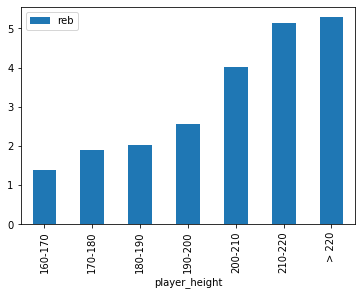

In [141]:
rebs.plot('player_height', 'reb', kind = 'bar')

In [52]:
gsw = pd.read_csv('GSW.csv')


In [33]:
gsw.head()

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,PF,Yes,244.0,MISSED,GSW,Jump Shot,3,SAS,92.0,0:39,2016-10-25,Draymond Green,NaN,1,MISSED
1,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,2016-10-25,Kevin Durant,26.0,1,SCORED
2,SCORED,SG,Yes,74.0,SCORED,GSW,Running Reverse Layup,2,SAS,251.0,1:40,2016-10-25,Klay Thompson,35.0,1,MISSED
3,MISSED,PF,Yes,54.0,MISSED,GSW,Cutting Layup Shot,2,SAS,231.0,2:32,2016-10-25,Draymond Green,52.0,1,MISSED
4,MISSED,PG,Yes,308.0,MISSED,GSW,Jump Shot,3,SAS,380.0,2:58,2016-10-25,Stephen Curry,26.0,1,MISSED


In [50]:
gsw = gsw[['location x', 'location y', 'current shot outcome']].reset_index(drop=True)
# gsw['location y'] = gsw['location y'] + 50
less_550 = gsw[gsw['location x'] <= 550]
more_550 = gsw[gsw['location x'] > 550]
more_550['location x'] = more_550['location x'] + 88
# less_550['location x'] += 25
new_df = pd.concat([less_550, more_550], ignore_index = True)
new_df.head()
#gsw['location y'] = gsw['location y'] + 25
#gsw.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/GSW.json', orient = 'values')

/Users/buitifuljoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,location x,location y,current shot outcome
0,244.0,92.0,MISSED
1,197.0,244.0,SCORED
2,74.0,251.0,MISSED
3,54.0,231.0,MISSED
4,308.0,380.0,MISSED


In [51]:
new_df.to_json(r'/Users/buitifuljoseph/Documents/DSC106_FinalProject/GSW.json', orient = 'values')